# Important necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data download and exploration

In [2]:
df = pd.read_csv('travel.csv')

In [3]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [7]:
df.shape

(1987, 10)

In [8]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

# Examining the dataset info

In [9]:
df.info

<bound method DataFrame.info of       Unnamed: 0  Age               Employment Type GraduateOrNot  \
0              0   31             Government Sector           Yes   
1              1   31  Private Sector/Self Employed           Yes   
2              2   34  Private Sector/Self Employed           Yes   
3              3   28  Private Sector/Self Employed           Yes   
4              4   28  Private Sector/Self Employed           Yes   
...          ...  ...                           ...           ...   
1982        1982   33  Private Sector/Self Employed           Yes   
1983        1983   28  Private Sector/Self Employed           Yes   
1984        1984   28  Private Sector/Self Employed           Yes   
1985        1985   34  Private Sector/Self Employed           Yes   
1986        1986   34  Private Sector/Self Employed           Yes   

      AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
0           400000              6                1            No   
1  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


# Variable notes
- Age- Age Of The Customer
- Employment Type- The Sector In Which Customer Is Employed
- GraduateOrNot- Whether The Customer Is College Graduate Or Not
- AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
- FamilyMembers- Number Of Members In Customer's Family
- ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
- FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
- EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
- TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019

In [11]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


min age is= 25 and max age = 35
family members min= 2 max= 9

# Data analysis: Creating various plots to examine connections between variables

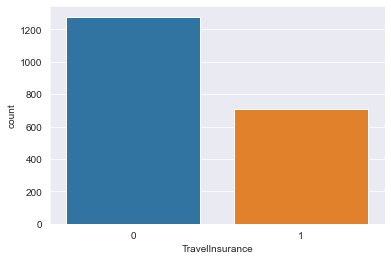

In [12]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='TravelInsurance')
plt.show()

### near about 700 peoples taken insurance out of 1986

<AxesSubplot:xlabel='Age', ylabel='count'>

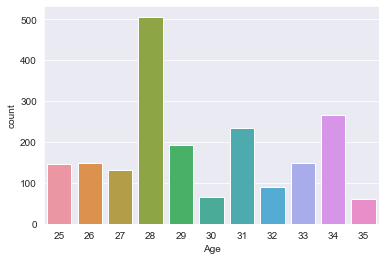

In [13]:
# ``Countplot``: Who did insurance and who did not
# x axis = Age
# y axis = count
sns.countplot(data=df, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

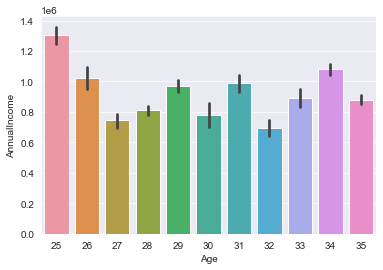

In [14]:
sns.barplot(data=df, x='Age',  y='AnnualIncome')

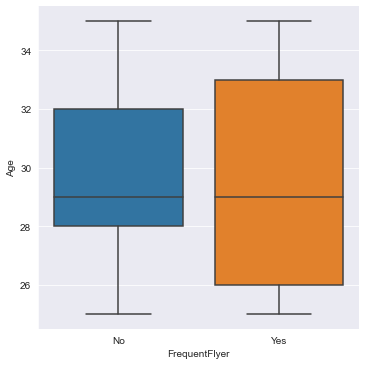

In [15]:
sns.catplot(data=df, x='FrequentFlyer', y= 'Age', kind='box')

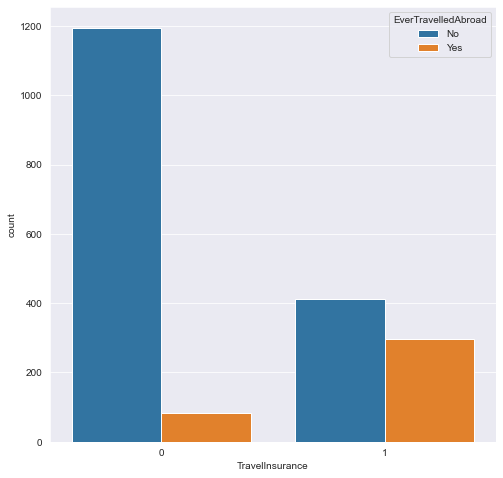

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='EverTravelledAbroad',x='TravelInsurance',data=df)
plt.show()

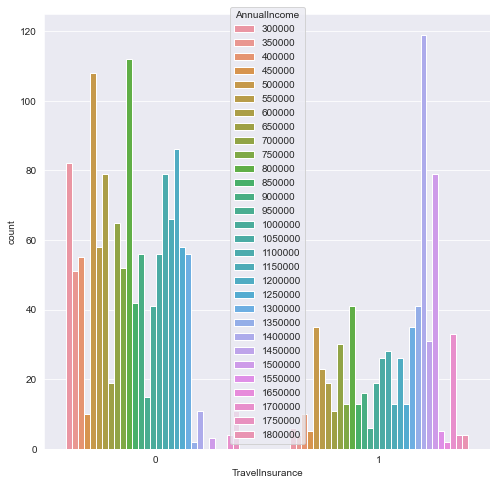

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='AnnualIncome',x='TravelInsurance',data=df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

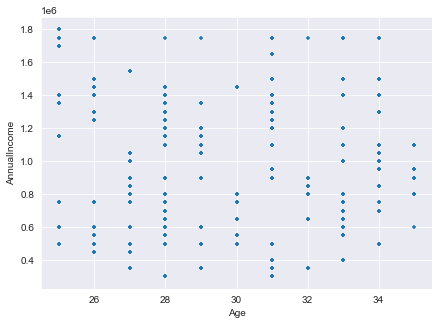

In [18]:
df.plot.scatter(x='Age', y='AnnualIncome', marker='+', figsize= (7,5))

<AxesSubplot:>

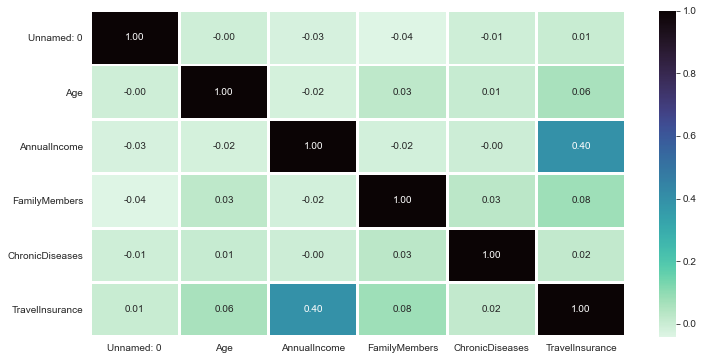

In [19]:
# Correlation among different features using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='mako_r', fmt='.2f', linewidths=2, annot=True)

# Data cleansing and removing unneccasary columns

In [20]:
df.EverTravelledAbroad.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [21]:
df.FrequentFlyer.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [22]:
df.GraduateOrNot.unique()##cheching uniqness

array(['Yes', 'No'], dtype=object)

In data we can see that FrequentFlyer, EverTravelledAbroad & GraduateOrNot columns having yes or no for proper results will convert it into yes=1 and no=0

Simillarly for Employment Type column will convert graduate= 1 and non-graduate=0**

In [23]:
#function for converting yes or no

def clean_string(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [24]:
#function for employment
def employment(x):
    if x == 'Government Sector':
        return 1
    else:
        return 0

In [25]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [26]:
df_clean = df
df_clean['GraduateOrNot'] = df_clean['GraduateOrNot'].apply(clean_string)
df_clean['FrequentFlyer'] = df_clean['FrequentFlyer'].apply(clean_string)
df_clean['EverTravelledAbroad'] = df_clean['EverTravelledAbroad'].apply(clean_string)
df_clean['Employment Type'] = df_clean['Employment Type'].apply(employment)

In [27]:
df_clean

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,0,1,1500000,4,0,1,1,1
1983,1983,28,0,1,1750000,5,1,0,1,0
1984,1984,28,0,1,1150000,6,1,0,0,0
1985,1985,34,0,1,1000000,6,0,1,1,1


In [28]:
df_clean.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0


In [29]:
df_drop = df_clean.drop("Unnamed: 0",axis=1)

In [30]:
df_drop.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


Dropped First column which dont have any relation in data

# Checking Null values

In [31]:
df.isnull().head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

There is no null values existing in my dataset

# Checking through heatmap if there is any null value or not

<AxesSubplot:>

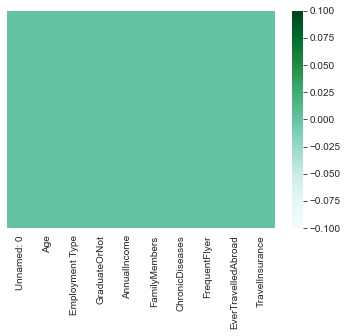

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='BuGn') 

In here i have shown that there is no null value in above heatmap

# Split Data in Training & Testing samples

In [34]:
df_drop.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [35]:
x = df_drop.iloc[:,:-1]
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [36]:
y = df_drop['TravelInsurance']
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: TravelInsurance, dtype: int64

From above data we can see that it is in different units so if we pass same data our model will not give better accuracy to convert all data in same format will use standard scaler method

In [37]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

In [38]:
standard = StandardScaler()
std_x = standard.fit_transform(x)

# Split Data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.20, random_state= 20)

print("Training data:{}".format(x_train.shape))
print("Test data:{}".format(x_test.shape))

Training data:(1589, 8)
Test data:(398, 8)


In [40]:
results = []

# Building Logistic Regression Model

In [41]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test, y_test)

In [42]:
print(score)
print(y_predicted)

0.7738693467336684
[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


In [43]:
print("Predicted_value","true_vale")
for i,j in zip(y_predicted, y_test):
    print(i,j)

Predicted_value true_vale
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 1
0 1
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
0 0
0 0
0 1
1 1
0 0
0 0
0 1
1 1
0 1
0 0
0 0
1 0
0 1
0 0
0 0
0 1
0 0
1 1
0 1
0 0
1 1
1 1
0 1
0 0
0 0
0 0
1 1
1 0
0 1
0 1
0 1
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
1 0
0 0
0 0
1 1
1 1
0 1
0 1
1 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 0
0 0
1 1
0 1
1 1
1 1
0 0
0 0
0 0
0 1
0 0
1 1
0 0
1 1
0 1
0 1
0 0
0 0
0 1
1 0
1 1
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
1 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
1 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 1
0 1
0 0
0 1
0 1
0 0
0 1
1 1
0 0
0 0
0 1
0 1
1 1
1 1
0 0
0 0
1 0
0 1
1 1
0 0
1 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
1 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 

# Using MinMax Scalar to preprocess data

In [44]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

In [45]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(x)

In [46]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [47]:
X_minmax

array([[0.6, 1. , 1. , ..., 1. , 0. , 0. ],
       [0.6, 0. , 1. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 1. , 0. , 0. ],
       ...,
       [0.3, 0. , 1. , ..., 1. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 0. , 1. , 1. ],
       [0.9, 0. , 1. , ..., 0. , 0. , 0. ]])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax,y,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1589, 8)
Shape of Test Xs:(398, 8)
Shape of Training y:(1589,)
Shape of Test y:(398,)


In [49]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test)

In [50]:
print(score)
print(y_predicted)

0.7688442211055276
[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]


# Assesement of Test accuracy

In [51]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       248
           1       0.82      0.49      0.62       150

    accuracy                           0.77       398
   macro avg       0.79      0.71      0.73       398
weighted avg       0.78      0.77      0.75       398



# Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[232,  16],
       [ 76,  74]], dtype=int64)

In [54]:
from sklearn.metrics import plot_confusion_matrix

In [55]:
classes = df['TravelInsurance'].value_counts()


C:\Users\onaya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


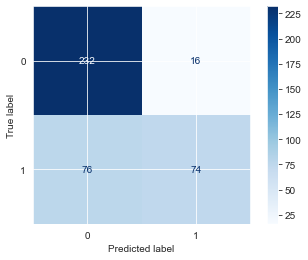

In [56]:
disp = plot_confusion_matrix (clf, x_test, y_test, cmap='Blues', values_format='.3g')

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.7688442211055276

# Plotting the ROC Curve

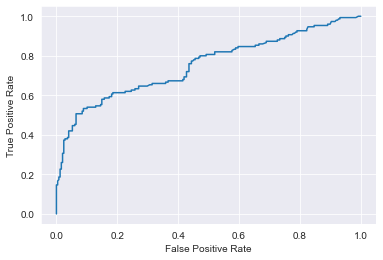

In [58]:
from sklearn import metrics 
y_predicted_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Calculating the AUC Curve

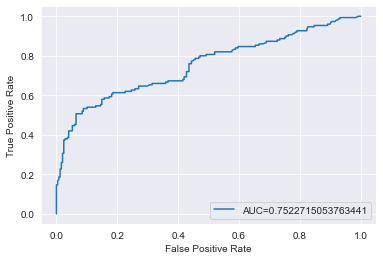

In [59]:
y_predicted_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predicted_proba)
auc = metrics.roc_auc_score(y_test, y_predicted_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Hyperparameter Tuning: GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}

#LR=LogisticRegression

clf_cv=GridSearchCV(clf,grid,cv=10)
clf_cv.fit(x_train,y_train)

print("\nTuned hpyerparameters : best parameters - ",clf_cv.best_params_)
print("\nAccuracy :",clf_cv.best_score_)


Tuned hpyerparameters : best parameters -  {'C': 1.0, 'penalty': 'l2'}

Accuracy : 0.7684061778520818


In [61]:
clf=LogisticRegression(C=1,penalty="l2")
clf.fit(x_train,y_train)
print("score",clf.score(x_test,y_test))

score 0.7688442211055276


# Conclusion

### The accompanying graphs and models demonstrate that logistic regression is effective. It is possible to additionally modify the logistic regression model to enhance performances. The program's capacity to distinguish between those who purchased travel insurance and those who did not from such a vast quantity of data is absolutely remarkable.